In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_excel('iris.xls') #to read the dataset
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.shape

(150, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data.isna().sum() # TO check the null values

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

# to check whether the data is normally distributed or not plot histogram

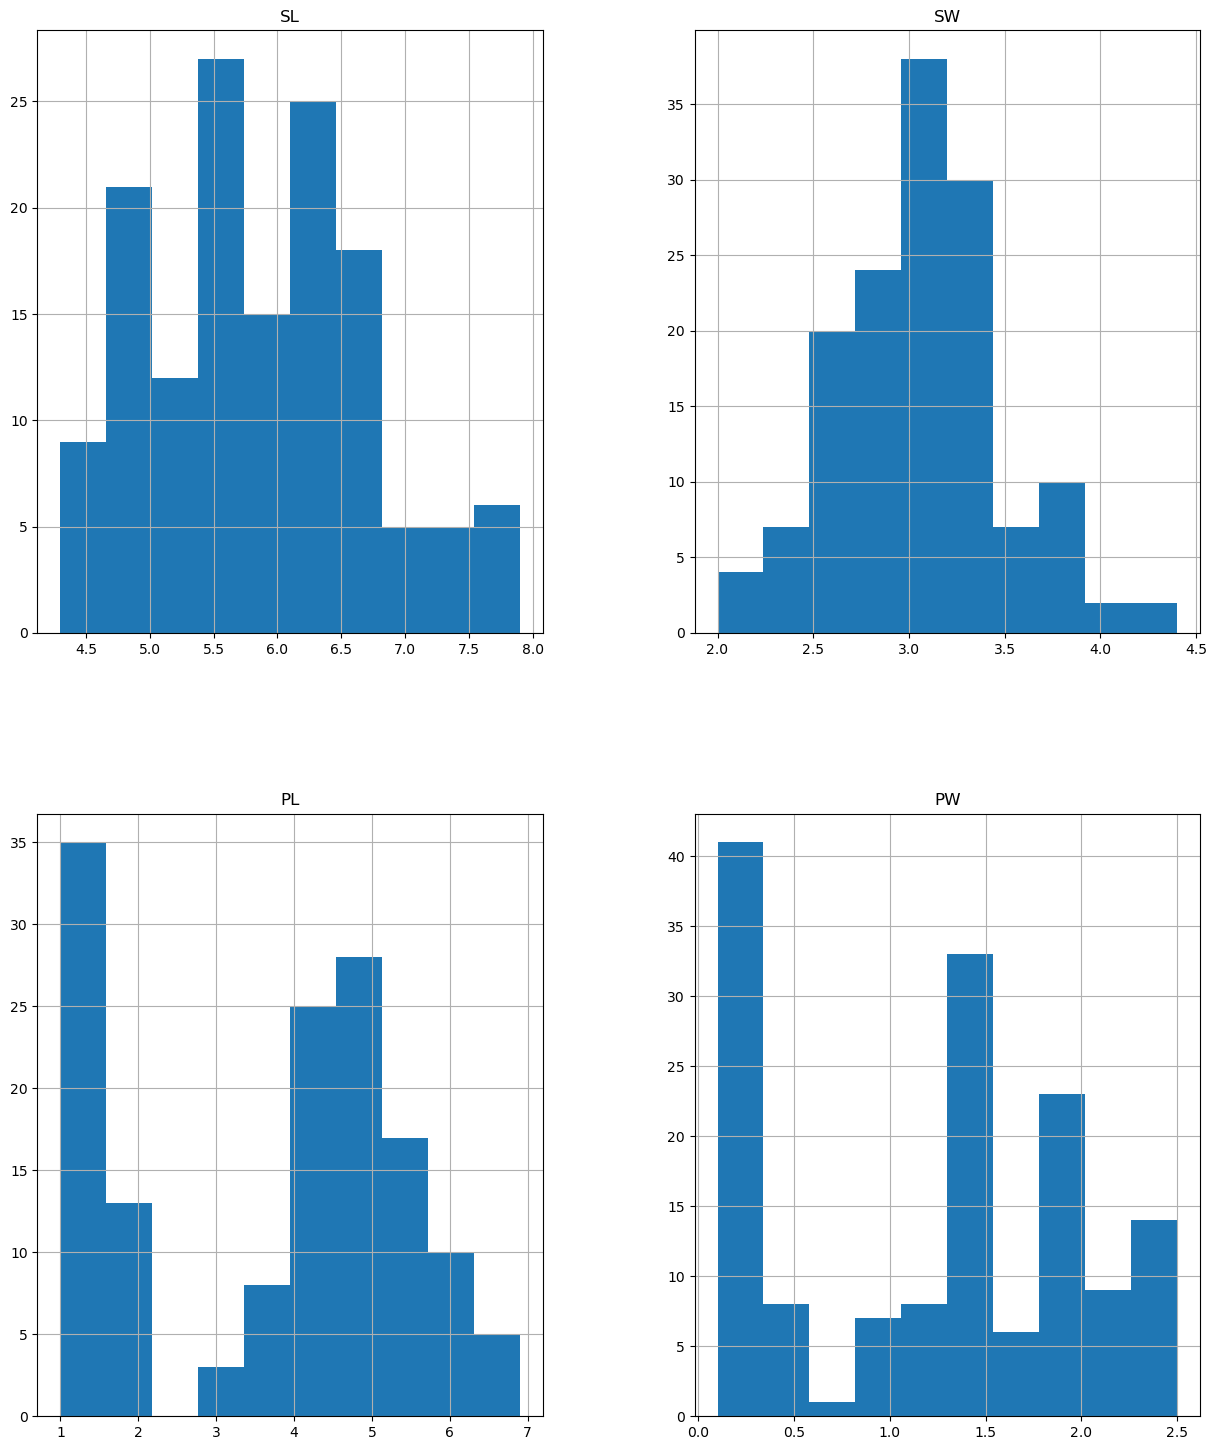

In [10]:
freqgraph = data.select_dtypes(include =['float'])
freqgraph.hist(figsize=(15,18))
plt.show()

In [11]:
#The histograms are rightly skewed. So the missing values ae filled using median.

In [12]:
null_col = ['SL','SW','PL']
for i in null_col:
     data[i] = data[i].fillna(data[i].median())
     
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [13]:
num_col =['SL','SW','PL','PW']

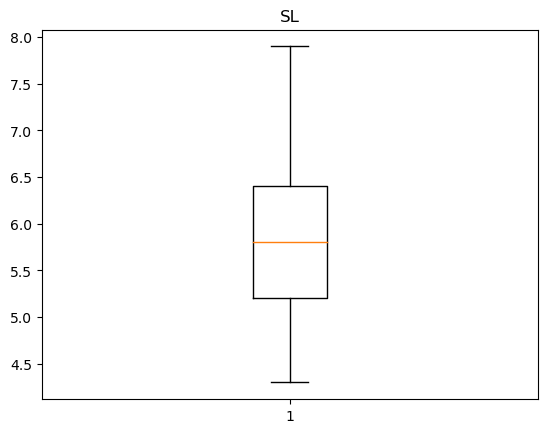

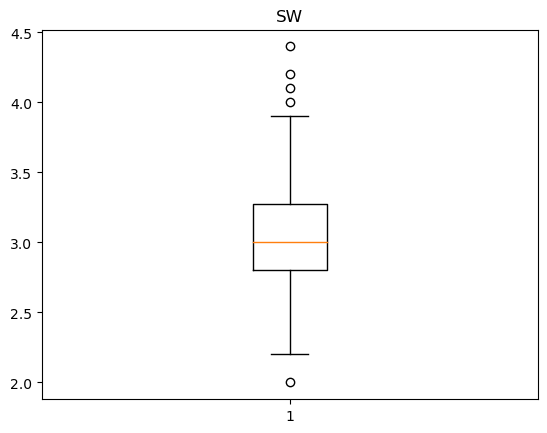

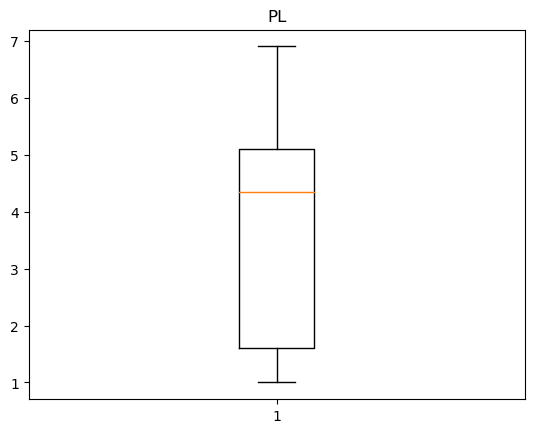

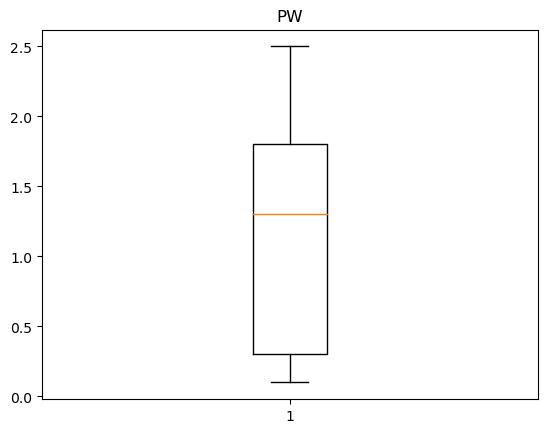

In [14]:
for i in num_col:
     plt.boxplot(data[i])
     plt.title(i)
     plt.show()

In [15]:
#Handling the missing values in 'SW' column

In [16]:
Q1 = np.percentile(data['SW'],25,interpolation='midpoint')
Q2 = np.percentile(data['SW'],50,interpolation='midpoint')
Q3 = np.percentile(data['SW'],75,interpolation='midpoint')

C:\Users\USER\AppData\Local\Temp\ipykernel_9376\141597090.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['SW'],25,interpolation='midpoint')
C:\Users\USER\AppData\Local\Temp\ipykernel_9376\141597090.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['SW'],50,interpolation='midpoint')
C:\Users\USER\AppData\Local\Temp\ipykernel_9376\141597090.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpo

In [17]:
IQR = Q3-Q1
up_lim  = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

In [18]:
print(up_lim)
print(low_lim)

3.9250000000000003
2.1249999999999996


In [19]:
## Flooring and Capping for handling outliers

In [20]:
data['SW']=np.where(data['SW']>up_lim,up_lim,np.where(data['SW']<low_lim,low_lim,data['SW']))
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,Iris-setosa
1,4.9,3.0,1.40,0.2,Iris-setosa
2,5.8,3.2,1.30,0.2,Iris-setosa
3,4.6,3.1,1.50,0.2,Iris-setosa
4,5.0,3.6,1.40,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,Iris-virginica
146,6.3,2.5,5.00,1.9,Iris-virginica
147,6.5,3.0,4.35,2.0,Iris-virginica
148,6.2,3.4,5.40,2.3,Iris-virginica


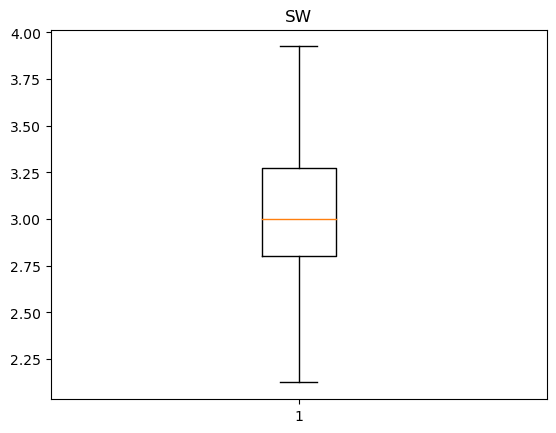

In [21]:
plt.boxplot(data['SW']) # To check the outliers in SW column  are Floored and Capped
plt.title('SW')
plt.show()

In [22]:
#The above boxplot shows that there is no outliers present in the 'SW' column

# Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification']) #To label encode the categorical column 'Classification'
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


In [24]:
#Here scaling is not needed.The values in each feature column have similar magnitudes and ranges

# Splitting the data to feaure and target

In [25]:
X = data.drop(['Classification'],axis=1)
y = data['Classification']
X

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.8,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,4.35,2.0
148,6.2,3.4,5.40,2.3


In [26]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classification, Length: 150, dtype: int32

In [27]:
from sklearn.model_selection import train_test_split #splitting the data for testing and training
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=42)

3.Find out which classification model gives the best result 

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logr = LogisticRegression()

In [30]:
logit_model= logr.fit(X_train,y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
y_pred_logr = logit_model.predict(X_test)

In [34]:
#Evaluation Metrics

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [35]:
print('Accuracy_Score =',accuracy_score(y_test,y_pred_logr))
print('Precision_Score =',precision_score(y_test,y_pred_logr,average='macro'))

print('Recall_Score = ',recall_score(y_test,y_pred_logr,average='macro'))
print('f1_Score = ',f1_score(y_test,y_pred_logr,average='macro'))

Accuracy_Score = 1.0
Precision_Score = 1.0
Recall_Score =  1.0
f1_Score =  1.0


In [36]:
confusion_matrix(y_test,y_pred_logr)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# k-Nearest Neighbor

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
metric = []
neighbors = np.arange(3,15)
for k in neighbors:
        classifier = KNeighborsClassifier(n_neighbors= k,metric = 'minkowski',p=2)
        classifier.fit(X_train,y_train)
        y_pred_knn = classifier.predict(X_test)
        acc = accuracy_score(y_test,y_pred_knn)
        metric.append(acc)

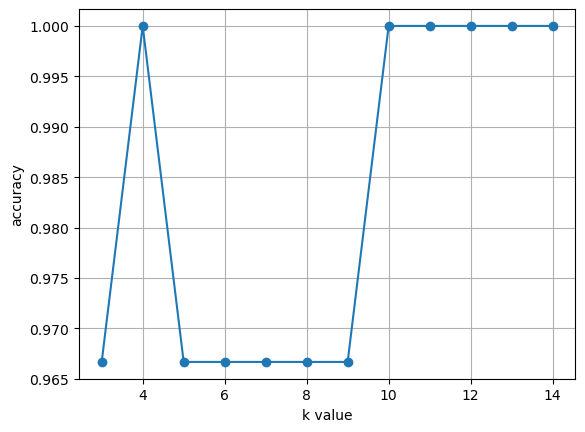

In [39]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [41]:
classifier = KNeighborsClassifier(n_neighbors= 4,metric = 'minkowski',p=2)
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)

In [42]:
print('Accuracy_Score =',accuracy_score(y_test,y_pred_logr))
print('Precision_Score =',precision_score(y_test,y_pred_logr,average='macro'))

print('Recall_Score = ',recall_score(y_test,y_pred_logr,average='macro'))
print('f1_Score = ',f1_score(y_test,y_pred_logr,average='macro'))

Accuracy_Score = 1.0
Precision_Score = 1.0
Recall_Score =  1.0
f1_Score =  1.0


In [43]:
confusion_matrix(y_test,y_pred_knn)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [44]:
#Both Logistic Regression and kNN models have same accuracy.